<a href="https://colab.research.google.com/github/TheGuyCheese/BharatIntern_ML_Internship/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/houseprice/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print("Total Number of Rows followed by Columns are:", df.shape)

Total Number of Rows followed by Columns are: (21613, 21)


In [ ]:
df_filled = df.fillna(0)

In [ ]:
nan_values=df_filled.isna().sum()
print(nan_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df_filled.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.230602,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.268520,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<ipython-input-10-18501ce997eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df_filled.corr()


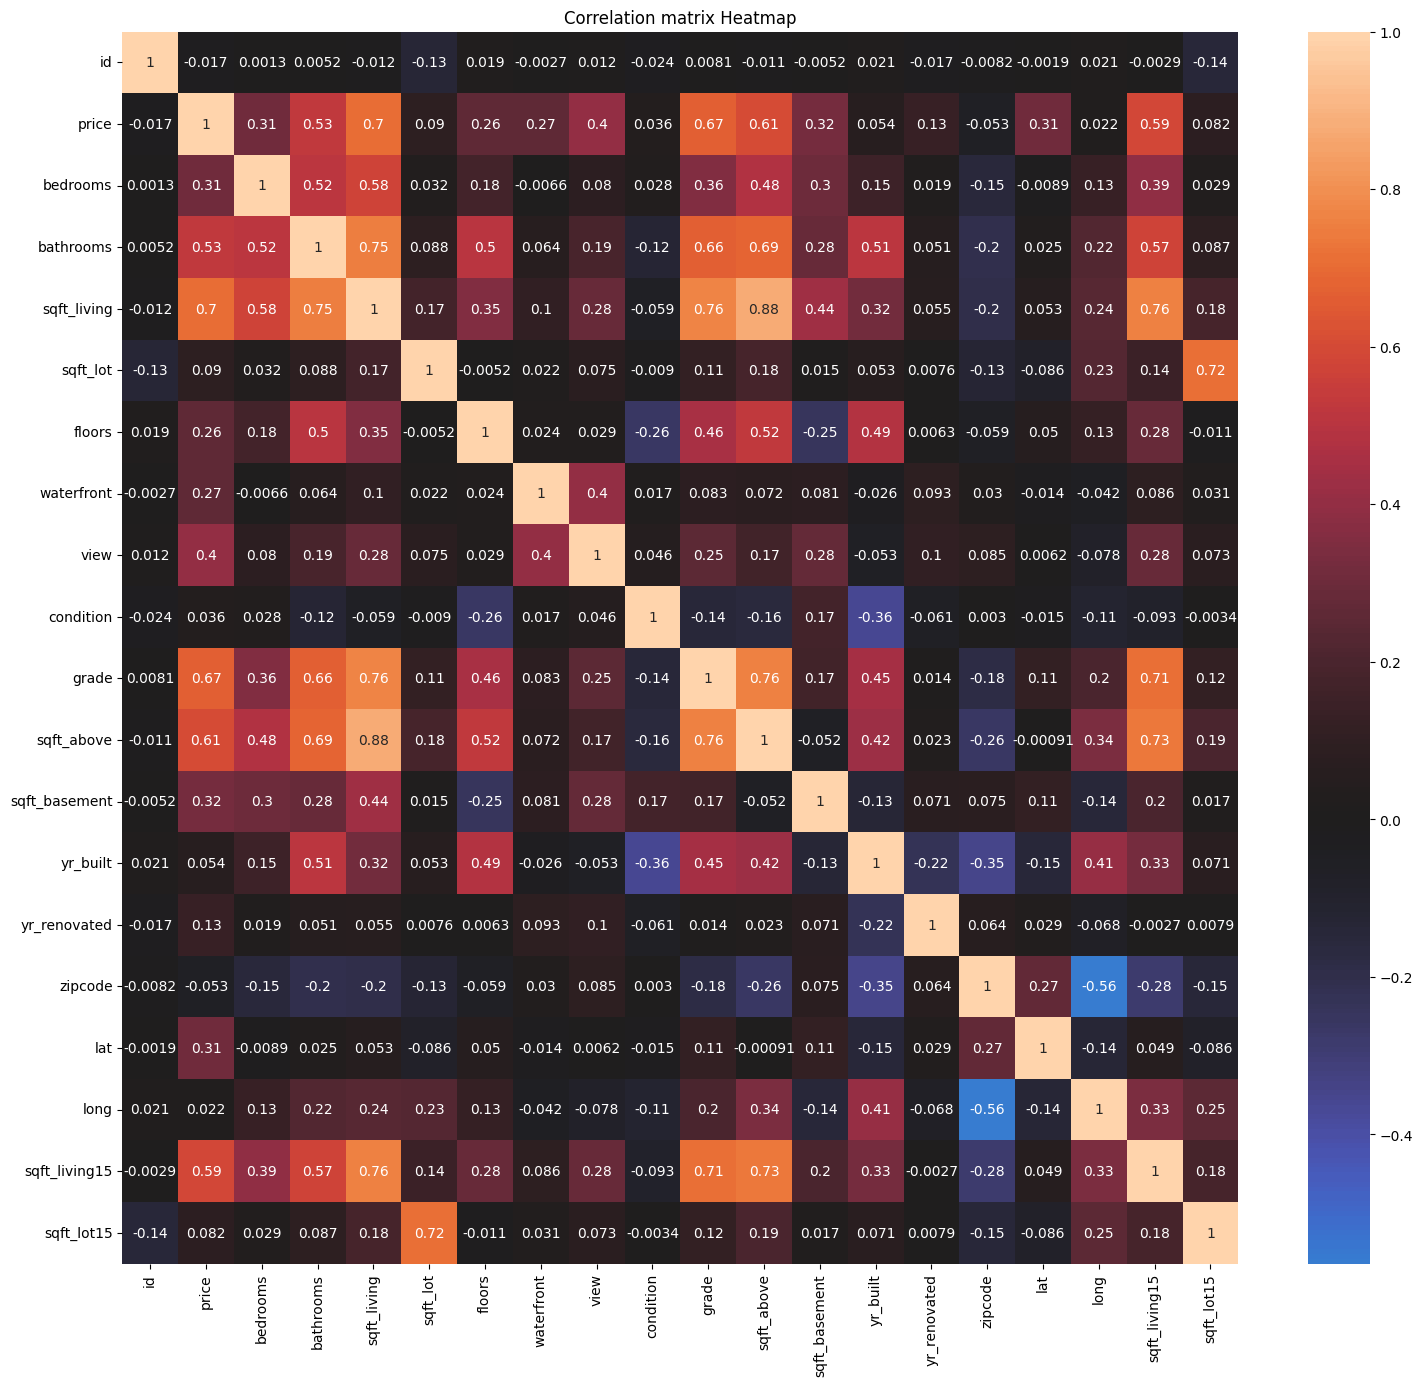

In [ ]:
correlation_matrix=df_filled.corr()
plt.figure(figsize=(18,16))
sns.heatmap(correlation_matrix, annot=True, center=0)

plt.title("Correlation matrix Heatmap")
plt.show()

In [ ]:
X=df_filled.drop(columns=['price', 'date'])
Y=df_filled.iloc[:, 2:3]
Y.shape

(21613, 1)

In [ ]:
minmax_scale = MinMaxScaler()
Y_scaled = minmax_scale.fit_transform(Y)

X_scaled = minmax_scale.fit_transform(X)
X_scaled

array([[0.72010308, 0.09090909, 0.125     , ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.64785332, 0.09090909, 0.28125   , ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.56879485, 0.06060606, 0.125     , ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.15378321, 0.06060606, 0.09375   , ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.0293272 , 0.09090909, 0.3125    , ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.15378321, 0.06060606, 0.09375   , ..., 0.18272425, 0.10686629,
        0.00081098]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()
reg = GradientBoostingRegressor(n_estimators=100,
                                learning_rate=0.05,
                                max_depth=5,
                                validation_fraction=0.1,
                                n_iter_no_change=10)
sel = SelectFromModel(estimator=reg, threshold='median')
X_train_selected = sel.fit_transform(X_train, y_train)
X_val_selected = sel.transform(X_test)

reg.fit(X_train_selected, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_iter_no_change=10)

In [ ]:
train_score = reg.score(X_train_selected, y_train)
val_score = reg.score(X_val_selected, y_test)
print("Validation Score: ", val_score)

Validation Score:  0.8256746976970999


In [ ]:
predicts = reg.predict(X_val_selected)
mse=mean_squared_error(y_test, predicts)
r2 = r2_score(y_test, predicts)
rmse = np.sqrt(mse)
print(rmse, mse, r2)

0.020539369053518337 0.0004218656811166267 0.8256746976970999
